In [48]:
import os
import sys
import numpy as np
import json
import time
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
pos_img_path = './polyvore-dataset-master/images/'
neg_img_path = './negative_outfit/images/'
json_path    = './negative_outfit/'

In [50]:
with open(json_path + 'train_outfit2item.json', 'r') as f:
    train_outfit = json.load(f)
with open(json_path + 'train_new_outfit.json', 'r') as f:
    train_new_outfit = json.load(f)
    
with open(json_path + 'valid_outfit2item.json', 'r') as f:
    valid_outfit = json.load(f)
with open(json_path + 'valid_new_outfit.json', 'r') as f:
    valid_new_outfit = json.load(f)
    
with open(json_path + 'test_outfit2item.json', 'r') as f:
    test_outfit = json.load(f)
with open(json_path + 'test_new_outfit.json', 'r') as f:
    test_new_outfit = json.load(f)
    

In [51]:
train_set_ids = []
valid_set_ids = []
test_set_ids  = []

train_items_len = []
valid_items_len = []
test_items_len  = []

for outfit, items in train_outfit.items():
    set_id = outfit
    train_set_ids.append(set_id)
    lst = len(items)
    train_items_len.append(lst)

for outfit, items in valid_outfit.items():
    set_id = outfit
    valid_set_ids.append(set_id)
    lst = len(items)
    valid_items_len.append(lst)

for outfit, items in test_outfit.items():
    set_id = outfit
    test_set_ids.append(set_id)
    lst = len(items)
    test_items_len.append(lst)

print(len(train_set_ids))
print(len(valid_set_ids))
print(len(test_set_ids))
print(train_items_len[0])

17316
1497
3076
7


In [53]:
pos_items = []
neg_items = []

for outfit, items in train_outfit.items():
    pos_items.append(items)
for i in range(len(train_new_outfit)):
    for j in range(len(train_new_outfit[i])):
        neg_items.append(train_new_outfit[i])
        break

print(len(pos_items), ' ', len(neg_items))
print(pos_items[0])
print(neg_items[0])

17316   17316
['194508109', '188778349', '188977857', '194942557', '194941874', '194578327', '190204630']
['194088670', '133292224', '188977857', '194942557', '194941874', '194578327', '190204630']


1484


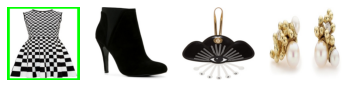

In [56]:
rand_num = np.random.randint(len(train_outfit))
print(rand_num)
for i in range(train_items_len[rand_num]):
    pos_path = pos_img_path + '{}/{}.jpg'.format(train_set_ids[rand_num],i+1)
    image = cv2.imread(pos_path)
    rgb_image = cv2.imread(pos_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if pos_items[rand_num][i] == neg_items[rand_num][i]:
        rgb_image = cv2.resize(rgb_image, (256,256), interpolation=cv2.INTER_AREA)

        plt.subplot(2,train_items_len[rand_num],i+1)
        plt.imshow(rgb_image)
        plt.axis('off')
    else:
        shape = rgb_image.shape
        w = shape[1]
        h = shape[0]
        base_size = h+20, w+20, 3
        base=np.zeros(base_size, dtype=np.uint8)
        cv2.rectangle(base, (0,0), (w+20, h+20), (0,255,0), 50)
        base[10:h+10, 10:w+10] = rgb_image
        rgb_image = cv2.resize(base, (256,256), interpolation=cv2.INTER_AREA)
        plt.subplot(2,train_items_len[rand_num], i+1)
        plt.imshow(rgb_image)
        plt.axis('off')
plt.savefig('./sampling_outfit/pos_outfit.png')

1484


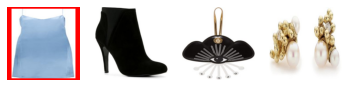

In [57]:
print(rand_num)
for i in range(train_items_len[rand_num]):
    neg_path = neg_img_path + '{}/{}.jpg'.format(train_set_ids[rand_num],i+1)
    image = cv2.imread(neg_path)
    rgb_image = cv2.imread(neg_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if pos_items[rand_num][i] == neg_items[rand_num][i]:
        rgb_image = cv2.resize(rgb_image, (256,256), interpolation=cv2.INTER_AREA)

        plt.subplot(2,train_items_len[rand_num],i+1)
        plt.imshow(rgb_image)
        plt.axis('off')
    else:
        shape = rgb_image.shape
        w = shape[1]
        h = shape[0]
        base_size = h+20, w+20, 3
        base=np.zeros(base_size, dtype=np.uint8)
        cv2.rectangle(base, (0,0), (w+20, h+20), (255,0,0), 50)
        base[10:h+10, 10:w+10] = rgb_image
        rgb_image = cv2.resize(base, (256,256), interpolation=cv2.INTER_AREA)
        plt.subplot(2,train_items_len[rand_num], i+1)
        plt.imshow(rgb_image)
        plt.axis('off')
plt.savefig('./sampling_outfit/neg_outfit.png')